# Generative Adversarial Networks (GANs)



## Setup

In [1]:
import torch
import torch.nn as nn
from torch.nn import init
from torch.autograd import Variable
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets

import numpy as np

import matplotlib
# Force matplotlib to not use any Xwindows backend.
# matplotlib.use('Agg')

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from torchvision.utils import save_image
# from torchvision.datasets import MNIST
import os


def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x


# Set parameters 
num_epochs = 2000
batch_size = 100
# for testing, batch_size = 3
batch_size = 50

learning_rate = 0.0005
crop_img_width = 28
# crop_img_width = 168
channel_size = 3

# Set Hyperparameters
# epoch = 10
# batch_size =100
# learning_rate = 0.0005


# %matplotlib inline
# plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

# def show_images(images):
#     images = np.reshape(images, [images.shape[0], -1])  # images reshape to (batch_size, D)
#     sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
#     sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

#     fig = plt.figure(figsize=(sqrtn, sqrtn))
#     gs = gridspec.GridSpec(sqrtn, sqrtn)
#     gs.update(wspace=0.05, hspace=0.05)

#     for i, img in enumerate(images):
#         ax = plt.subplot(gs[i])
#         plt.axis('off')
#         ax.set_xticklabels([])
#         ax.set_yticklabels([])
#         ax.set_aspect('equal')
#         plt.imshow(img.reshape([sqrtimg,sqrtimg]))
#     return 

# def preprocess_img(x):
#     return 2 * x - 1.0

# def deprocess_img(x):
#     return (x + 1.0) / 2.0

# def rel_error(x,y):
#     return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

# def count_params(model):
#     """Count the number of parameters in the current TensorFlow graph """
#     param_count = np.sum([np.prod(p.size()) for p in model.parameters()])
#     return param_count

# answers = np.load('gan-checks-tf.npz')

## Dataset


In [2]:
# # Data augmentation and normalization for training
# # Just normalization for validation
# data_transforms = {
#     'train': transforms.Compose([
#         transforms.RandomSizedCrop(224),
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]),
#     'val': transforms.Compose([
#         transforms.Scale(256),
#         transforms.CenterCrop(224),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]),
# }

# transform = transforms.Compose([
#              transforms.Scale((32,32)),
#              transforms.ToTensor(),
#              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])




# data_dir = '../dataset_small'
# image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
#                                           data_transforms[x])
#                   for x in []}
# dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
#                                              shuffle=True, num_workers=4)
#               for x in []}


# trainset = dset.ImageFolder(root="imgs",transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True,         num_workers=2)



# dataset_sizes = {x: len(image_datasets[x]) for x in []}
# class_names = image_datasets[].classes

# use_gpu = torch.cuda.is_available()




img_transform = transforms.Compose([
    transforms.RandomCrop(crop_img_width),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# test
dataset = datasets.ImageFolder(root='../dataset_center_pixel', transform=img_transform)

# real
# dataset = datasets.ImageFolder(root='../dataset_small', transform=img_transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)





# class ChunkSampler(sampler.Sampler):
#     """Samples elements sequentially from some offset. 
#     Arguments:
#         num_samples: # of desired datapoints
#         start: offset where we should start selecting from
#     """
#     def __init__(self, num_samples, start=0):
#         self.num_samples = num_samples
#         self.start = start

#     def __iter__(self):
#         return iter(range(self.start, self.start + self.num_samples))

#     def __len__(self):
#         return self.num_samples

# NUM_TRAIN = 50000
# NUM_VAL = 5000

# NOISE_DIM = 96
# batch_size = 128

# mnist_train = dset.MNIST('./cs231n/datasets/MNIST_data', train=True, download=True,
#                            transform=T.ToTensor())
# loader_train = DataLoader(mnist_train, batch_size=batch_size,
#                           sampler=ChunkSampler(NUM_TRAIN, 0))

# mnist_val = dset.MNIST('./cs231n/datasets/MNIST_data', train=True, download=True,
#                            transform=T.ToTensor())
# loader_val = DataLoader(mnist_val, batch_size=batch_size,
#                         sampler=ChunkSampler(NUM_VAL, NUM_TRAIN))


# imgs = loader_train.__iter__().next()[0].view(batch_size, 784).numpy().squeeze()
# show_images(imgs)

## Show images

In [3]:
# get a batch of images
inputs = dataloader.__iter__().next()
# inputs = next(iter(dataloader))


(50, 2352)


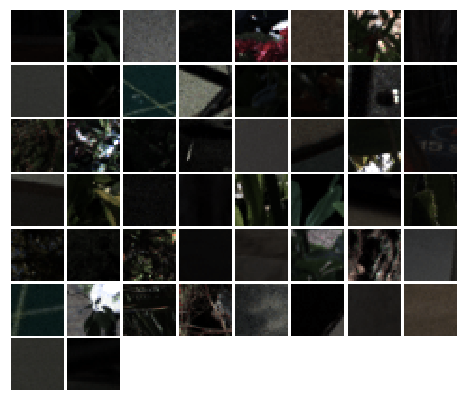

In [50]:

def show_images(images):
    # images = images * 255.0
    img_max = np.max(images)
    img_min = np.min(images)
    images = 255.0 * (images - img_min) / (img_max - img_min)
    
    # print(images.shape)
    images = np.reshape(images, [images.shape[0], -1])  # images reshape to (batch_size, D)
    print(images.shape)
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1] / 3)))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        img = img.reshape([3,sqrtimg,sqrtimg])
        img = np.swapaxes(np.swapaxes(img,1,2),0,2)
        plt.imshow(img.astype('uint8'))
    plt.show()
    # plt.pause(0.001)
    return 

def show_images_large(images):
    # images = images * 255.0
    img_max = np.max(images)
    img_min = np.min(images)
    images = 255.0 * (images - img_min) / (img_max - img_min)
    
    # print(images.shape)
    images = np.reshape(images, [images.shape[0], -1])  # images reshape to (batch_size, D)
    print(images.shape)
    sqrtn = int(np.ceil(images.shape[0]))
    sqrtimg = int(np.ceil(images.shape[1] / 3))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        img = img.reshape([1,sqrtimg,sqrtimg])
        img = np.swapaxes(np.swapaxes(img,1,2),0,2)
        plt.imshow(img.astype('uint8'))
    plt.show()
    # plt.pause(0.001)
    return 


def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
        plt.pause(0.001)  # pause a bit so that plots are updated

    
def imshow2(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
# inputs, classes = next(iter(dataloaders['train']))
# inputs = next(iter(dataloader))


# Make a grid from batch
# out = torchvision.utils.make_grid(inputs[0])

# imshow2(out)
    
    

# Get a batch of training data
# inputs = next(iter(dataloader))
# 128x3x10x10
# 128

# print(inputs[0])

to_show = inputs[0].view(batch_size, crop_img_width*crop_img_width*channel_size).numpy().squeeze()
# print(to_show)
show_images(to_show)

# Make a grid from batch
# print("imshow")
# out = torchvision.utils.make_grid(inputs[0])
# imshow(out)


## CPU / GPU

In [5]:
dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor ## UNCOMMENT THIS LINE IF YOU'RE ON A GPU!

## Encoder

In [6]:
# Encoder 
# torch.nn.Conv2d(in_channels, out_channels, kernel_size,
#                 stride=1, padding=0, dilation=1,
#                 groups=1, bias=True)
# batch x 1 x 28 x 28 -> batch x 512

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.layer1 = nn.Sequential(
                        nn.Conv2d(channel_size,32,3,padding=1),   # batch x 16 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.Conv2d(32,32,3,padding=1),   # batch x 16 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.Conv2d(32,64,3,padding=1),  # batch x 32 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(64),
                        nn.Conv2d(64,64,3,padding=1),  # batch x 32 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(64),
                        nn.MaxPool2d(2,2)   # batch x 64 x 14 x 14
        )
        self.layer2 = nn.Sequential(
                        nn.Conv2d(64,128,3,padding=1),  # batch x 64 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.Conv2d(128,128,3,padding=1),  # batch x 64 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.MaxPool2d(2,2),
                        nn.Conv2d(128,256,3,padding=1),  # batch x 64 x 7 x 7
                        nn.ReLU()
        )
        
                
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(batch_size, -1)
        return out

## Decoder

In [7]:
# Decoder 
# torch.nn.ConvTranspose2d(in_channels, out_channels, kernel_size,
#                          stride=1, padding=0, output_padding=0,
#                          groups=1, bias=True)
# output_height = (height-1)*stride + kernel_size - 2*padding + output_padding
# batch x 512 -> batch x 1 x 28 x 28

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.layer1 = nn.Sequential(
                        nn.ConvTranspose2d(256,128,3,2,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.ConvTranspose2d(128,128,3,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.ConvTranspose2d(128,64,3,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(64),
                        nn.ConvTranspose2d(64,64,3,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(64)
        )
        self.layer2 = nn.Sequential(
                        nn.ConvTranspose2d(64,32,3,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.ConvTranspose2d(32,32,3,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.ConvTranspose2d(32,channel_size,3,2,1,1),
                        nn.ReLU()
        )
        
    def forward(self,x):
        out = x.view(batch_size,256,7,7)
        out = self.layer1(out)
        out = self.layer2(out)
        return out

In [8]:
# Check output of autoencoder

encoder = Encoder().type(dtype)
decoder = Decoder().type(dtype)

for image, _ in dataloader: # if this is in dataset, we'd lose the batch dimension 
    image = Variable(image).type(dtype)
    
    output = encoder(image)
    output = decoder(output)
    print(output.size())
    break

torch.Size([50, 3, 28, 28])


## Noise

In [9]:
def sample_noise(batch_size, dim):
    """
    Generate a PyTorch Tensor of uniform random noise.

    Input:
    - batch_size: Integer giving the batch size of noise to generate.
    - dim: Integer giving the dimension of noise to generate.
    
    Output:
    - A PyTorch Tensor of shape (batch_size, dim) containing uniform
      random noise in the range (-1, 1).
    """
    noise = torch.rand(batch_size, dim) * 2 - 1
    return noise

# def test_sample_noise():
#     batch_size = 3
#     dim = 4
#     torch.manual_seed(231)
#     z = sample_noise(batch_size, dim)
#     np_z = z.cpu().numpy()
#     assert np_z.shape == (batch_size, dim)
#     assert torch.is_tensor(z)
#     assert np.all(np_z >= -1.0) and np.all(np_z <= 1.0)
#     assert np.any(np_z < 0.0) and np.any(np_z > 0.0)
#     print('All tests passed!')
    
# test_sample_noise()

## Loss func and optimizer

In [10]:
# loss func and optimizer
# we compute reconstruction after decoder so use Mean Squared Error
# In order to use multi parameters with one optimizer,
# concat parameters after changing into list

parameters = list(encoder.parameters())+ list(decoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=learning_rate)

## Running 

In [116]:
try:
    encoder, decoder = torch.load('./saved_models/deno_autoencoder.pkl')
    print("\n--------model restored--------\n")
except:
    print("\n--------model not restored--------\n")
    pass

# noise = torch.rand(batch_size,channel_size,28,28)

print("Starting run \n")
for epoch in range(num_epochs):
    for image, _ in dataloader:
        noise = torch.rand(image.size()[0], channel_size,28,28)
        image_n = torch.mul(image+0.25, 0.1 * noise)
        
        image = Variable(image).type(dtype)
        image_n = Variable(image_n).type(dtype)
        #label = Variable(label.float()).type(dtype)
        optimizer.zero_grad()
        
        # output of noisy image 
        output = encoder(image_n)
        output = decoder(output)
        
        # loss compared to original
        loss = loss_func(output,image)
        loss.backward()
        optimizer.step()            
        
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch+1, num_epochs, loss.data[0]))
#     if epoch % 10 == 0:
#         # output.data?
#         imgs_numpy = output.data.cpu().numpy()
#         show_images(imgs_numpy[0:16])
#         plt.show()
#         # pic = to_img(output.cpu().data)
#         # save_image(pic, './dc_img/image_{}.png'.format(epoch))
#         to_show = inputs[0].view(batch_size, crop_img_width*crop_img_width*channel_size).numpy().squeeze()


    # torch.save(model.state_dict(), './conv_autoencoder.pth')
    if epoch % 100 ==0:
        saveStr = './saved_models/deno_autoencoder_epoch_' + str(epoch) + '.pkl'
        torch.save([encoder,decoder], saveStr)
        print('model saved as: ', saveStr)


--------model not restored--------

Starting run 

epoch [1/2000], loss:0.6511
model saved as:  ./saved_models/deno_autoencoder_epoch_0.pkl
epoch [2/2000], loss:0.6737
epoch [3/2000], loss:0.6479
epoch [4/2000], loss:0.6325
epoch [5/2000], loss:0.6492
epoch [6/2000], loss:0.6943
epoch [7/2000], loss:0.6087
epoch [8/2000], loss:0.6910
epoch [9/2000], loss:0.6207
epoch [10/2000], loss:0.6630
epoch [11/2000], loss:0.6549
epoch [12/2000], loss:0.6436
epoch [13/2000], loss:0.6841
epoch [14/2000], loss:0.7014
epoch [15/2000], loss:0.6835
epoch [16/2000], loss:0.6451
epoch [17/2000], loss:0.6285
epoch [18/2000], loss:0.7104
epoch [19/2000], loss:0.7090
epoch [20/2000], loss:0.6951
epoch [21/2000], loss:0.6876
epoch [22/2000], loss:0.6620
epoch [23/2000], loss:0.6786
epoch [24/2000], loss:0.7019
epoch [25/2000], loss:0.6255
epoch [26/2000], loss:0.6588
epoch [27/2000], loss:0.7172
epoch [28/2000], loss:0.6723
epoch [29/2000], loss:0.6495
epoch [30/2000], loss:0.6942
epoch [31/2000], loss:0.67

/home/cs231n/myVE35/lib/python3.5/site-packages/torch/serialization.py:147: UserWarning: Couldn't retrieve source code for container of type Encoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/cs231n/myVE35/lib/python3.5/site-packages/torch/serialization.py:147: UserWarning: Couldn't retrieve source code for container of type Decoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


KeyboardInterrupt: 

(50, 2352)


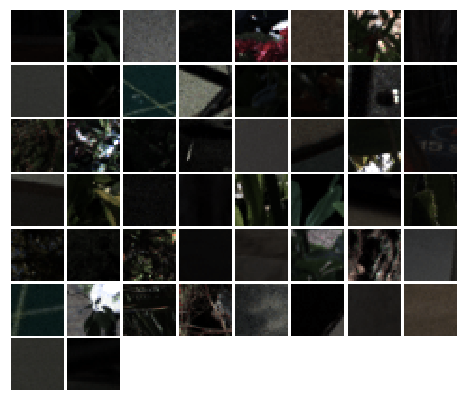

In [11]:
inputs = dataloader.__iter__().next()
to_show = inputs[0].view(batch_size, crop_img_width*crop_img_width*channel_size).numpy().squeeze()
show_images(to_show)

/Users/Max/Documents/lightfield_research/assignment3/.env/lib/python3.5/site-packages/torch/serialization.py:286: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/Max/Documents/lightfield_research/assignment3/.env/lib/python3.5/site-packages/torch/serialization.py:286: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)



--------model not restored--------

Starting run 

torch.Size([3, 3, 28, 28])
(3, 2352)


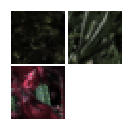

(3, 2352)


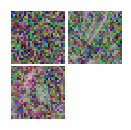

(3, 2352)


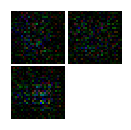

epoch [1/2000], loss:0.7636
model saved as:  ./saved_models/deno_autoencoder_epoch_0.pkl


/Users/Max/Documents/lightfield_research/assignment3/.env/lib/python3.5/site-packages/torch/serialization.py:147: UserWarning: Couldn't retrieve source code for container of type Encoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/Max/Documents/lightfield_research/assignment3/.env/lib/python3.5/site-packages/torch/serialization.py:147: UserWarning: Couldn't retrieve source code for container of type Decoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [12]:


try:
    encoder, decoder = torch.load('./saved_models/deno_autoencoder_epoch_1000.pkl')
    print("\n--------model restored--------\n")
except:
    print("\n--------model not restored--------\n")
    pass

test_epochs = 1

print("Starting run \n")
for epoch in range(test_epochs):
    for image, _ in dataloader:
        print(image[0:3].size())
        show_input = image[0:3].view(3, crop_img_width*crop_img_width*channel_size).numpy().squeeze()
        show_images(show_input)
        plt.show()
        
        noise = torch.rand(image.size()[0], channel_size,28,28)
        image_n = torch.mul(image+0.25, 0.1 * noise)
        
        show_noisy = image_n[0:3].view(3, crop_img_width*crop_img_width*channel_size).numpy().squeeze()
        show_images(show_noisy)
        plt.show()
        
        image = Variable(image).type(dtype)
        image_n = Variable(image_n).type(dtype)
        #label = Variable(label.float()).type(dtype)
        optimizer.zero_grad()
        
        # output of noisy image 
        output = encoder(image_n)
        output = decoder(output)
        
        show_images(output.data.cpu().numpy()[0:3])
        plt.show()
        
        
        # loss compared to original
        loss = loss_func(output,image)
        
        break;
#         loss.backward()
#         optimizer.step()            
        
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch+1, num_epochs, loss.data[0]))
#     if epoch % 10 == 0:
#         # output.data?
#         imgs_numpy = output.data.cpu().numpy()
#         show_images(imgs_numpy[0:16])
#         plt.show()
#         # pic = to_img(output.cpu().data)
#         # save_image(pic, './dc_img/image_{}.png'.format(epoch))
#         to_show = inputs[0].view(batch_size, crop_img_width*crop_img_width*channel_size).numpy().squeeze()


    # torch.save(model.state_dict(), './conv_autoencoder.pth')
    if epoch % 100 ==0:
        saveStr = './saved_models/deno_autoencoder_epoch_' + str(epoch) + '.pkl'
        torch.save([encoder,decoder], saveStr)
        print('model saved as: ', saveStr)

/Users/Max/Documents/lightfield_research/assignment3/.env/lib/python3.5/site-packages/torch/serialization.py:286: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/Max/Documents/lightfield_research/assignment3/.env/lib/python3.5/site-packages/torch/serialization.py:286: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)



--------model not restored--------

Starting run 

torch.Size([3, 3, 28, 28])
(3, 2352)


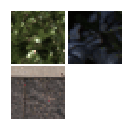

(3, 2352)


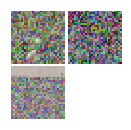

(3, 2352)


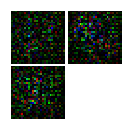

epoch [1/2000], loss:0.6759
model saved as:  ./saved_models/deno_autoencoder_epoch_0.pkl


/Users/Max/Documents/lightfield_research/assignment3/.env/lib/python3.5/site-packages/torch/serialization.py:147: UserWarning: Couldn't retrieve source code for container of type Encoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/Max/Documents/lightfield_research/assignment3/.env/lib/python3.5/site-packages/torch/serialization.py:147: UserWarning: Couldn't retrieve source code for container of type Decoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [16]:


try:
    encoder, decoder = torch.load('./saved_models/deno_autoencoder_epoch_1000.pkl')
    print("\n--------model restored--------\n")
except:
    print("\n--------model not restored--------\n")
    pass

test_epochs = 1

print("Starting run \n")
for epoch in range(test_epochs):
    for image, _ in dataloader:
        print(image[0:3].size())
        show_input = image[0:3].view(3, crop_img_width*crop_img_width*channel_size).numpy().squeeze()
        show_images(show_input)
        plt.show()
        
        noise = torch.rand(image.size()[0], channel_size,28,28)
        image_n = torch.mul(image+0.25, 0.00001 * noise)
        
        show_noisy = image_n[0:3].view(3, crop_img_width*crop_img_width*channel_size).numpy().squeeze()
        show_images(show_noisy)
        plt.show()
        
        image = Variable(image).type(dtype)
        image_n = Variable(image_n).type(dtype)
        #label = Variable(label.float()).type(dtype)
        optimizer.zero_grad()
        
        # output of noisy image 
        output = encoder(image_n)
        output = decoder(output)
        
        show_images(output.data.cpu().numpy()[0:3])
        plt.show()
        
        
        # loss compared to original
        loss = loss_func(output,image)
        
        break;
#         loss.backward()
#         optimizer.step()            
        
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch+1, num_epochs, loss.data[0]))
#     if epoch % 10 == 0:
#         # output.data?
#         imgs_numpy = output.data.cpu().numpy()
#         show_images(imgs_numpy[0:16])
#         plt.show()
#         # pic = to_img(output.cpu().data)
#         # save_image(pic, './dc_img/image_{}.png'.format(epoch))
#         to_show = inputs[0].view(batch_size, crop_img_width*crop_img_width*channel_size).numpy().squeeze()


    # torch.save(model.state_dict(), './conv_autoencoder.pth')
    if epoch % 100 ==0:
        saveStr = './saved_models/deno_autoencoder_epoch_' + str(epoch) + '.pkl'
        torch.save([encoder,decoder], saveStr)
        print('model saved as: ', saveStr)

/Users/Max/Documents/lightfield_research/assignment3/.env/lib/python3.5/site-packages/torch/serialization.py:286: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/Max/Documents/lightfield_research/assignment3/.env/lib/python3.5/site-packages/torch/serialization.py:286: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)



--------model not restored--------

Starting run 

torch.Size([3, 3, 28, 28])
(3, 2352)


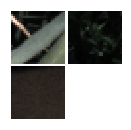

(3, 2352)


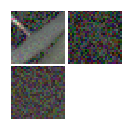

(3, 2352)


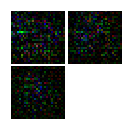

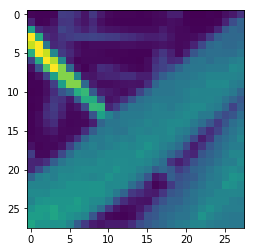

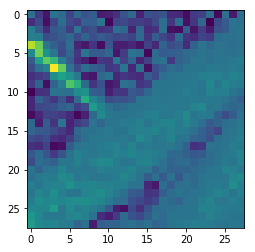

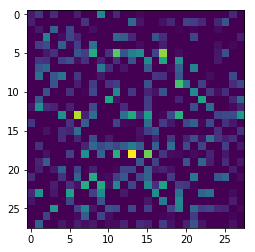

epoch [1/2000], loss:0.7412
model saved as:  ./saved_models/deno_autoencoder_epoch_0.pkl


/Users/Max/Documents/lightfield_research/assignment3/.env/lib/python3.5/site-packages/torch/serialization.py:147: UserWarning: Couldn't retrieve source code for container of type Encoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/Max/Documents/lightfield_research/assignment3/.env/lib/python3.5/site-packages/torch/serialization.py:147: UserWarning: Couldn't retrieve source code for container of type Decoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [59]:


try:
    encoder, decoder = torch.load('./saved_models/deno_autoencoder_epoch_400.pkl')
    print("\n--------model restored--------\n")
except:
    print("\n--------model not restored--------\n")
    pass

test_epochs = 1

print("Starting run \n")
for epoch in range(test_epochs):
    for image, _ in dataloader:
        print(image[0:3].size())
        show_input = image[0:3].view(3, crop_img_width*crop_img_width*channel_size).numpy().squeeze()
        show_images(show_input)
        plt.show()
        
        noise = torch.rand(image.size()[0], channel_size,28,28)
        image_n = torch.mul(image+0.25, 0.1 * noise)
        
        show_noisy = image_n[0:3].view(3, crop_img_width*crop_img_width*channel_size).numpy().squeeze()
        show_images(show_noisy)
        plt.show()
        
        image = Variable(image).type(dtype)
        image_n = Variable(image_n).type(dtype)
        #label = Variable(label.float()).type(dtype)
        optimizer.zero_grad()
        
        # output of noisy image 
        output = encoder(image_n)
        output = decoder(output)
        
        show_images(output.data.cpu().numpy()[0:3])
        plt.show()
        
        
        # loss compared to original
        loss = loss_func(output,image)
        
        img = image[0].cpu()
        input_img = image_n[0].cpu()
        output_img = output[0].cpu()

        
        origin = img.data.numpy()
        origin = 255.0*(origin-np.min(origin)) / (np.max(origin)-np.min(origin))
        inp = input_img.data.numpy()
        inp = 255.0*(inp-np.min(inp)) / (np.max(inp)-np.min(inp))
        out = output_img.data.numpy()
        out = 255.0*(out-np.min(out)) / (np.max(out)-np.min(out))

        plt.imshow(origin[0].astype('uint8'))
        plt.show()

        plt.imshow(inp[0].astype('uint8'))
        plt.show()

        plt.imshow(out[0].astype('uint8'))
        plt.show()        
        break;
#         loss.backward()
#         optimizer.step()            
        
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch+1, num_epochs, loss.data[0]))
#     if epoch % 10 == 0:
#         # output.data?
#         imgs_numpy = output.data.cpu().numpy()
#         show_images(imgs_numpy[0:16])
#         plt.show()
#         # pic = to_img(output.cpu().data)
#         # save_image(pic, './dc_img/image_{}.png'.format(epoch))
#         to_show = inputs[0].view(batch_size, crop_img_width*crop_img_width*channel_size).numpy().squeeze()


    # torch.save(model.state_dict(), './conv_autoencoder.pth')
    if epoch % 100 ==0:
        saveStr = './saved_models/deno_autoencoder_epoch_' + str(epoch) + '.pkl'
        torch.save([encoder,decoder], saveStr)
        print('model saved as: ', saveStr)